In [1]:
from src.fABBA_test import fABBA
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
%matplotlib inline

<i>Prepare two different time series</i>

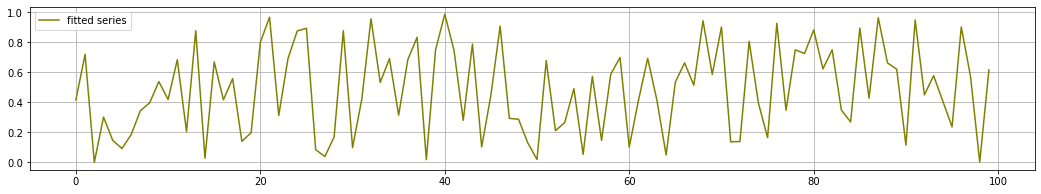

In [2]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
# np.save('datasets/x.npy', x)
# np.save('datasets/y.npy', y)

plt.figure(figsize=(18,3))
plt.plot(x, label='fitted series', c='olive')
plt.legend()
plt.grid(True)
plt.show()

#### <b>API Test</b>

><b>API: compression</b>

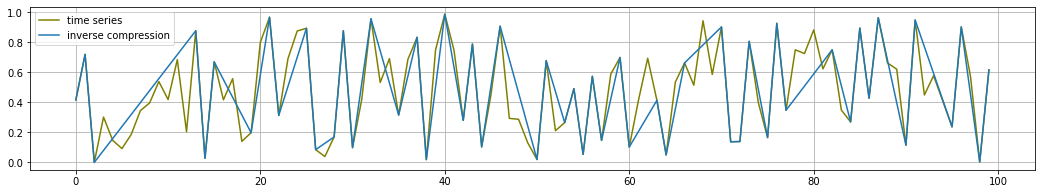

In [3]:
fabba = fABBA(tol=0.1, scl=1, sorting="2-norm", alpha=0.1, verbose=1, max_len=np.inf) 
pieces = np.array(fabba.compress(x, tol=0.1))
inverse_com = fabba.inverse_compress(pieces, x[0])
plt.figure(figsize=(18,3))
plt.plot(x, label='time series', c='olive')
plt.plot(inverse_com, label='inverse compression')
plt.legend()
plt.grid(True)
plt.show()

><b>API: digitization</b>

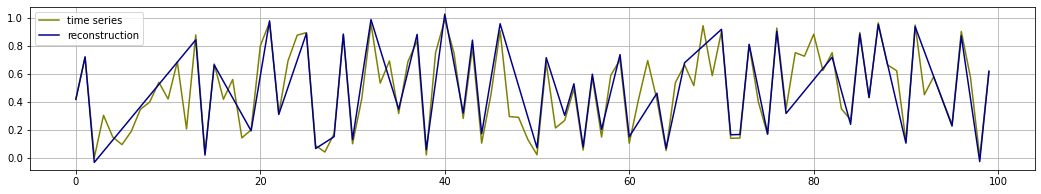

In [4]:
strings = fabba.digitize(pieces[:,:2])
rpieces = fabba.inverse_digitize(strings,fabba.centers, fabba.hashmap)
rpieces = fabba.quantize(rpieces)
inverse_ts = fabba.inverse_compress(rpieces, x[0])
plt.figure(figsize=(18,3))
plt.plot(x, label='time series', c='olive')
plt.plot(inverse_ts, label='reconstruction', c='darkblue')
plt.legend()
plt.grid(True)
plt.show()

><b>API: fit transform</b>

Compression: Reduced series of length 100 to 52 segments. Digitization: Reduced 52 pieces to 34 symbols.


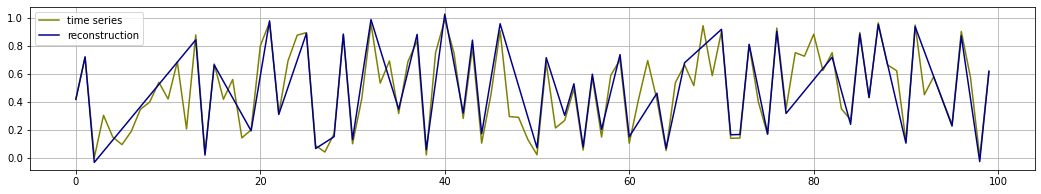

In [5]:
fabba = fABBA(tol=0.1, alpha=0.1, sorting='2-norm', scl=1, verbose=1, max_len=np.inf) 
strings = fabba.fit_transform(x)
inverse_ts = fabba.inverse_transform(strings, x[0])
plt.figure(figsize=(18,3))
plt.plot(x, label='time series', c='olive')
plt.plot(inverse_ts, label='reconstruction', c='darkblue')
plt.legend()
plt.grid(True)
plt.show()

Compression: Reduced series of length 100 to 52 segments. Digitization: Reduced 52 pieces to 34 symbols.


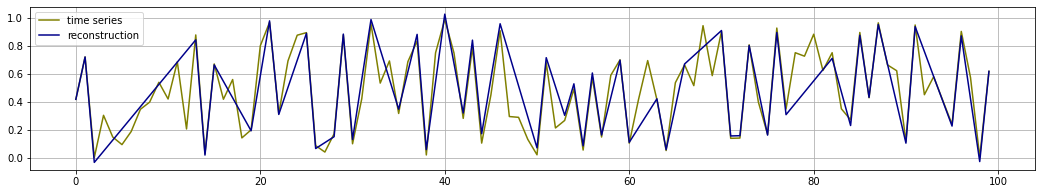

In [6]:
fabba = fABBA(tol=0.1, alpha=0.1, sorting='lexi', scl=1, verbose=1, max_len=np.inf) 
strings = fabba.fit_transform(x)
inverse_ts = fabba.inverse_transform(strings, x[0])
plt.figure(figsize=(18,3))
plt.plot(x, label='time series', c='olive')
plt.plot(inverse_ts, label='reconstruction', c='darkblue')
plt.legend()
plt.grid(True)
plt.show()

34